<a href="https://colab.research.google.com/github/DieryValencia/Networkly-proyect/blob/main/Laboratorio_de_fisica_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

La distancia máxima es:  100490.58704206203
La altura máxima es:  21080.40363094565
El tiempo de vuelo es:  131.1811448339876
Velocidad inicial necesaria: 7577.34 m/s
Ángulo de disparo necesario: 175.13°


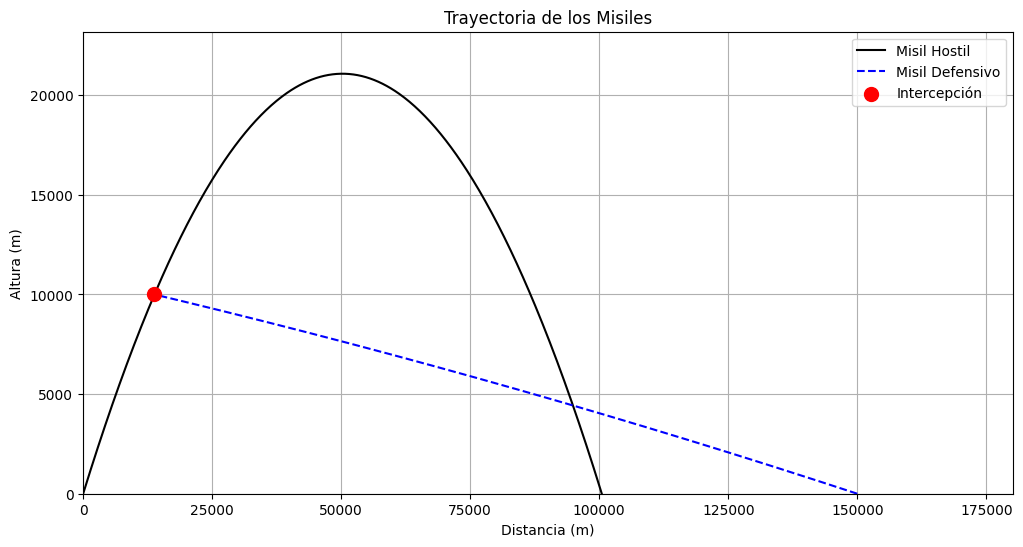

In [38]:
#Diery Valencia
#Yeraldin Araujo
import numpy as np
from matplotlib import pyplot as plt
from sympy import symbols, solve, Eq, sin, cos

# Clase que representa el misil enemigo
class MisilHostil:
    def __init__(self, velocidad_inicial, angulo_disparo):
        self.velocidad_inicial = velocidad_inicial
        self.angulo = np.radians(angulo_disparo)
        self.gravedad = 9.8

        self.altura_maxima = 0
        self.distancia_maxima = 0
        self.tiempo_vuelo = 0

    def calcularTrayectoria(self):
        self.altura_maxima = (self.velocidad_inicial**2 * (np.sin(self.angulo)**2)) * 0.5 / self.gravedad  # Altura máxima
        self.distancia_maxima = (self.velocidad_inicial**2 * np.sin(2 * self.angulo)) / self.gravedad  # Distancia máxima
        self.tiempo_vuelo = 2 * (self.velocidad_inicial * np.sin(self.angulo)) / self.gravedad  # Tiempo de vuelo

        print('La distancia máxima es: ', self.distancia_maxima)
        print('La altura máxima es: ', self.altura_maxima)
        print('El tiempo de vuelo es: ', self.tiempo_vuelo)

        return self.altura_maxima, self.distancia_maxima, self.tiempo_vuelo

    def obtenerCoordenadas(self, t):
        x = self.velocidad_inicial * np.cos(self.angulo) * t
        y = self.velocidad_inicial * np.sin(self.angulo) * t - 0.5 * self.gravedad * t**2
        return x, y

    def calcularIntercepcion(self, altura_intercepcion):
        if altura_intercepcion > self.altura_maxima:
            print('No se puede interceptar el misil hostil')
            return False
        else:
            t = symbols('t')
            ecuacion_altura = Eq(self.velocidad_inicial * sin(self.angulo) * t - 0.5 * self.gravedad * t**2, altura_intercepcion)
            tiempos = solve(ecuacion_altura, t)

            tiempos_validos = [float(sol.evalf()) for sol in tiempos if sol.is_real and 0 <= sol.evalf() <= self.tiempo_vuelo]

            if len(tiempos_validos) == 0:
                print('No hay soluciones reales para la intercepción')
                return None

            return tiempos_validos


# Clase que representa el misil defensivo
class MisilDefensivo:
    def __init__(self, distancia_intercepcion, altura_intercepcion, tiempo_intercepcion, posicion_inicial):
        self.distancia_intercepcion = distancia_intercepcion
        self.altura_intercepcion = altura_intercepcion
        self.velocidad_inicial = 0
        self.angulo = 0
        self.gravedad = 9.8

        self.tiempo_intercepcion = tiempo_intercepcion
        self.posicion_inicial = posicion_inicial  # Posición inicial del misil defensivo

    def calcularParametros(self):
        t = self.tiempo_intercepcion

        # Ecuaciones para resolver el ángulo y velocidad inicial
        velocidad_inicial, angulo = symbols('velocidad_inicial angulo')

        # Ecuación de altura
        ecuacion_altura = Eq(velocidad_inicial * sin(angulo) * t - 0.5 * self.gravedad * t**2, self.altura_intercepcion)

        # Ecuación de distancia horizontal
        ecuacion_distancia = Eq(velocidad_inicial * cos(angulo) * t, self.distancia_intercepcion - self.posicion_inicial)

        # Resolver el sistema de ecuaciones
        soluciones = solve((ecuacion_altura, ecuacion_distancia), (velocidad_inicial, angulo))

        # Filtrar soluciones reales
        for sol in soluciones:
            self.velocidad_inicial = sol[0]
            self.angulo = sol[1]
            if self.velocidad_inicial.is_real and self.velocidad_inicial > 0 and self.angulo.is_real:
                self.velocidad_inicial = float(self.velocidad_inicial)
                self.angulo = float(self.angulo.evalf())
                print(f"Velocidad inicial necesaria: {self.velocidad_inicial:.2f} m/s")
                print(f"Ángulo de disparo necesario: {np.degrees(self.angulo):.2f}°")
                return self.velocidad_inicial, self.angulo

        print("No se encontraron soluciones reales para el ángulo y la velocidad inicial.")
        return None, None

    def obtenerCoordenadas(self, t):
        # Ajustar las coordenadas para considerar la posición inicial
        x = self.posicion_inicial + self.velocidad_inicial * np.cos(self.angulo) * t
        y = self.velocidad_inicial * np.sin(self.angulo) * t - 0.5 * self.gravedad * t**2
        return x, y

    def graficarTrayectorias(self, misil_hostil):
        # Gráficos
        t_total = np.linspace(0, misil_hostil.tiempo_vuelo, num=500)
        x_misil_hostil = [misil_hostil.obtenerCoordenadas(t)[0] for t in t_total]
        y_misil_hostil = [misil_hostil.obtenerCoordenadas(t)[1] for t in t_total]

        # Obtener coordenadas del misil defensivo
        t_defensivo = np.linspace(0, self.tiempo_intercepcion, num=500)
        x_defensivo = [self.posicion_inicial + self.velocidad_inicial * np.cos(self.angulo) * t for t in t_defensivo]
        y_defensivo = [self.velocidad_inicial * np.sin(self.angulo) * t - 0.5 * self.gravedad * t**2 for t in t_defensivo]

        # Graficar
        plt.figure(figsize=(12, 6))
        plt.plot(x_misil_hostil, y_misil_hostil, label='Misil Hostil', color='black')
        plt.plot(x_defensivo, y_defensivo, label='Misil Defensivo', color='blue', linestyle='--')

        # Marcar intercepción
        x_hostil, y_hostil = misil_hostil.obtenerCoordenadas(self.tiempo_intercepcion)
        plt.scatter([x_hostil], [y_hostil], color='red', label='Intercepción', zorder=5, s=100)

        # Personalizar gráfico
        plt.title('Trayectoria de los Misiles')
        plt.xlabel('Distancia (m)')
        plt.ylabel('Altura (m)')
        plt.grid()
        plt.legend()
        plt.xlim(0, max(misil_hostil.distancia_maxima, self.distancia_intercepcion + self.posicion_inicial) * 1.1)
        plt.ylim(0, max(misil_hostil.altura_maxima, self.altura_intercepcion) * 1.1)
        plt.show()


# Código principal

# Configurar el misil hostil
misil_hostil = MisilHostil(1000, 40)  # Puedes cambiar estos valores para modificar la velocidad y el ángulo del misil hostil
misil_hostil.calcularTrayectoria()

# Altura de intercepción
altura_intercepcion = 10000  # Puedes cambiar este valor para modificar la altura de intercepción

# Calcular el tiempo de intercepción
tiempos_validos = misil_hostil.calcularIntercepcion(altura_intercepcion)

if tiempos_validos:
    tiempo_seleccionado = tiempos_validos[0]  # Tiempo seleccionado para la intercepción

    # Distancia de intercepción calculada
    x_intercepcion, _ = misil_hostil.obtenerCoordenadas(tiempo_seleccionado)

    # Configurar el misil defensivo con una posición inicial
    posicion_inicial_defensivo = 150000  # Puedes cambiar este valor para modificar la posición inicial del misil defensivo

    misil_defensivo = MisilDefensivo(x_intercepcion, altura_intercepcion, tiempo_seleccionado, posicion_inicial_defensivo)
    misil_defensivo.calcularParametros()
    misil_defensivo.graficarTrayectorias(misil_hostil)
